# Your Final Project Title

- Vicky Xie: Did the majority of the coding
- Riley Smith: put their contribution here
- Finnley O'Rourke: put their contribution here
- Kayla Katakis: ...

## (rename?) Import and Install

In [16]:
# Install Neccesary Packages

!pip install textblob
!pip install nltk 
!pip install -U textblob
!pip install bokeh

# Import Necessary Libraries

import pandas as pd
import re
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from nltk.corpus import stopwords

# Downloading and Setting Up the Stopwords Package and Stemmer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Introduction

Our project focuses on the use of sentiment analysis and natural language processing in order to extract data from tweets regarding the Boston Marathon Bombings and Hurricane Sandy. The datasets observed looks at tweets in the aftermath of the both disasters, some of which are classified as “on topic” and others that are classified as “off-topic”. The “on-topic” tweets refer directly to the bombing or the hurricane while the “off-topic” tweets are about anything else. 
 
In order to extrapolate specific types of data from the data set our group used both VaderSentiment and TextBlob which helped create sentiment analysis scores for the various tweets. While both VaderSentiment and TextBlob are repositories that help coders perform sentiment analysis there are a few key differences that create variance within the data. 

Some of the differences between the two models include sentiment intensity vs. sentiment polarity. VaderSentimet uses a rule-based analysis in order to assign an intensity score (-1 to 1) to a given dataset. In contrast TextBlob uses a few different components like part-of-speech tagging and noun phrase extraction in order to assign a given tweet a polarity score (negative, neutral, or positive). Additionally, VaderSentiment is designed to incorporate other aspects of tweets such as emojis and capitalization which helps the program discern the level of sentiment.

# Research Questions

In this project, we will perform sentiment analysis and topic modeling to answer the following questions:
- How do Vader and TextBlob differ in creating sentiment scores for on topic tweets in regards to the Boston Marathon Bombings?
- How do Vader and TextBlob differ in creating sentiment scores for on-topic tweets about man-made disasters (Boston Marathon Bombing) versus natural disasters (Hurricane Sandy)?
- What are the main topic cluster that crop up in the tweets that are ‘on-topic’ in regards to the Boston Marathon Bombings? 
- How do they compare to the ‘on-topic’ topic clusters in the Hurricane Sandy tweets?

# Dataset Description

The Boston Bombings dataset takes looks at just over 10,000 tweets that are either about the Boston Marathon bombings or about other random topics. The Boston Bombings dataset has 3 columns.

- `label` - a string that indicates whether or not the tweet/observation is about the Boston Marathon Bombings , can either be ‘on-topic’ or ‘off-topic’
- `tweet id` - a string that gives each observation a unique identifier value
- `tweet` - a string that  represents the entire text of each unique tweet

Using the describe() function, we can see the the number of values for each column (count), and how many of those values are unique (unique). Additionally, we can see the ‘top’ value, which represents the most common value , and its frequency. For this dataset, there are 10,012 tweet id’s that are all unique and 10,012 total tweets, with 9,226 of those being unique. We see that our “top” id value only has a frequency of one, which is intuitive due to the unique nature of that variable. Our “top” tweet is actually a retweet that shows up 34 times in the dataset, meaning that there is likely an original tweet that was retweeted 34 times. There are only two unique “label” values, either on-topic or off-topic, with the more common label being on-topic with a count of 5,648.

The Hurricane Sandy dataset is structured identically to the Boston Bombing dataset, with the same 3 columns. The major difference, of course, is that being “on-topic” now refers to tweets that are directly related to Hurricane Sandy as opposed to the Boston Marathon Bombings. 

Using the describe() function on the Hurricane Sandy dataframe, we can see that there is nearly an equal number of tweets, with Hurricane Sandy having 10,008 tweets, each with their own unique id. Of the 10,008 tweets, 9,431 are unique with two potential labels, either on or off topic, which is the same as before. Similarly to the Boston Bombing data frame, the "top" tweet in this dataset is in the form of a retweet with a frequency of 28, meaning there is a likely an original tweet, and its retweets come up 28 times in this dataset. The more common label in this dataset is on-topic with a count of 6,138.

## 2013 Boston Bombing DF

In [2]:
bomb=pd.read_csv("2013_Boston_Bombings-ontopic_offtopic.csv")
bomb.describe()

,tweet id,tweet,label
count,10012,10012,10012
unique,10012,9226,2
top,'325208201740029952',RT @DannyAmendola: I will DONATE $100 for EVER...,on-topic
freq,1,34,5648


## 2012 Sandy Hurricane DF

In [3]:
sandy=pd.read_csv("2012_Sandy_Hurricane-ontopic_offtopic.csv")
sandy.describe()

,tweet id,tweet,label
count,10008,10008,10008
unique,10008,9431,2
top,'262596552399396864',"RT @HurricaneSandyw: FOR EVERY 100 RETWEETS, W...",on-topic
freq,1,28,6138


# Preprocessing

Before we begin analyzing the data, we first need to clean up our `tweet` column to get rid of any unnecessary information. 
To do so, we wrote a function called clean_text() that removes URLs, hashtags, mentions, and any unnecessary whitespace from the text to make sure that only the most meaningful aspects of the text are left for analysis. 

Additionally, our research questions revolve entirely around the on-topic tweets, so we will filter our datasets to include only these tweets to make our analysis easier and more efficient. We will also drop any empty tweets from the dataset.

In [4]:
# text cleaning
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#', '', text) # remove hashtag
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text.strip()

# Apply cleaning to Boston Bombing df:
bomb['clean_text'] = bomb.loc[(bomb[' label'] == 'on-topic')][' tweet'].apply(clean_text)
bomb=bomb.dropna(subset = ['clean_text'])

# Apply cleaning to Hurrican Sandy df:
sandy['clean_text'] = sandy.loc[(sandy[' label'] == 'on-topic')][' tweet'].apply(clean_text)
sandy=sandy.dropna(subset = ['clean_text'])

## Boston Bombing processed text:

In [5]:
bomb['clean_text'].head()

2     This is fucking crazy. Suspect 2 has like 2 ho...
5     Back Bay Businesses Large And Small Affected B...
9     9000 agents/officers working for 14 hours, so ...
17    Tough to grasp what's happening right now in ....
19    Thank you to everyone who is keeping our city ...
Name: clean_text, dtype: object

## Hurricane Sandy processed text:

In [6]:
sandy['clean_text'].head()

1     Sandy be soooo mad that she be shattering our ...
5     Neighborly duties. arrives to the rescue sport...
7     I don't know how I'm getting back to Jersey si...
10              Already flooded so much SANDY @ Hoboken
12    On that note, i pray that everyone stays safe,...
Name: clean_text, dtype: object

# Analysis

For our analysis, we chose to use Sentiment Analysis and Topic Modeling. Because we are interesteed in the way people tweet about both man-made and natural disasters, we felt that Sentiment Analysis would be a great way to judge how people use Twitter to either sympathize with our create positivity from these disasters. Additionally, Topic Modeling can help us understand what common themes pop up in tweets about these disasters and help us understand how people react when these events occur.

# Sentiment Analysis

In order to carry out our Sentiment Analysis, we first had to develop a few functions that we can then apply to our two datasets using both TextBlob and Vader. 

Our first function `get_sentiment_textblob()` takes in a text value, which will be each tweet in the dataset, and then using the TextBlob package to return a sentiment score label. Any score greater than 0 is 'Positive' sentiment, less than 0 is 'Negative', and equal to 0 is 'Neutral'. Our other TextBlob function, `get_sent_textblob_cont()` takes each tweet and returns the numerical, continuous sentiment score.

We also have `get_sentiment_vader()` that works the same way and gives tweets a 'Positive' label to tweets with a score of 0.05 or higher, 'Negative' when the score is less than -0.05, and 'Neutral' if the score is between those two values. Since the Vader library uses more aspects of the tweets, such as capitalizations and emojis, we chose to give the Vader functions a slightly wider range for neutral tweets to account for the larger scope of variables that go into calculating the score.  Similarly to its TextBlob counterpart, `get_sent_vader_cont()` takes each tweet and returns its numerical, continuous sentiment score.

Then we apply all four of our functions to each of our two datasets to create dataframes that include each unique tweet and the sentiment scores and labels from each library.

In [12]:
# Define a function for sentiment analysis using TextBlob
def get_sentiment_textblob(text):
    """
    this function takes text as the input and calculates the sentiment score of this given text.
    """
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

# get continuous textblob sentiment scores
def get_sent_textblob_cont(text):
    return TextBlob(text).sentiment.polarity

# Define a function for sentiment analysis using NLTK's Vader
def get_sentiment_vader(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return "Positive"
    elif sentiment['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"
    
# get continuous vader sentiment scores
def get_sent_vader_cont(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

## Boston Bombing

In [13]:
#Apply Snetiment Analysis functions to the Boston Bombings dataset
bomb['sentiment_textblob'] = bomb['clean_text'].apply(get_sentiment_textblob)
bomb['sent_textblob_cont'] = bomb['clean_text'].apply(get_sent_textblob_cont)
bomb['sentiment_vader'] = bomb['clean_text'].apply(get_sentiment_vader)
bomb['sent_vader_cont'] = bomb['clean_text'].apply(get_sent_vader_cont)
bomb[["clean_text", "sentiment_textblob", "sent_textblob_cont", "sentiment_vader", "sent_vader_cont"]]

,clean_text,sentiment_textblob,sent_textblob_cont,sentiment_vader,sent_vader_cont
2,This is fucking crazy. Suspect 2 has like 2 ho...,Negative,-0.600000,Negative,-0.3962
5,Back Bay Businesses Large And Small Affected B...,Negative,-0.011905,Negative,-0.1531
9,"9000 agents/officers working for 14 hours, so ...",Positive,0.200000,Positive,0.5233
17,Tough to grasp what's happening right now in ....,Positive,0.132275,Positive,0.8519
19,Thank you to everyone who is keeping our city ...,Positive,0.500000,Positive,0.8271
...,...,...,...,...,...
10007,RT : Boston bombing suspects’ dad says sons we...,Negative,-0.250000,Neutral,0.0000
10008,"Like the boston marathon, on a episode peter h...",Neutral,0.000000,Negative,-0.4939
10009,RT : MUST WATCH: Bruins fans sing emotional Na...,Negative,-0.050000,Positive,0.1531
10010,RT : So that Boston bombing was fake just like...,Negative,-0.500000,Negative,-0.1531


In [20]:
bomb[["sent_textblob_cont", "sent_vader_cont"]].describe()

,sent_textblob_cont,sent_vader_cont
count,5648.000000,5648.000000
mean,-0.006603,-0.235321
std,0.265398,0.464122
min,-1.000000,-0.976500
25%,-0.050000,-0.647500
50%,0.000000,-0.318200
75%,0.012500,0.000000
max,1.000000,0.946000


In [22]:
bomb[["sentiment_textblob", "sentiment_vader"]]

,sentiment_textblob,sentiment_vader
2,Negative,Negative
5,Negative,Negative
9,Positive,Positive
17,Positive,Positive
19,Positive,Positive
...,...,...
10007,Negative,Neutral
10008,Neutral,Negative
10009,Negative,Positive
10010,Negative,Negative


## Hurricane Sandy

In [14]:
#Applying Sentiment Analysis Functions to Hurricane Sandy Dataset
sandy['sentiment_textblob'] = sandy['clean_text'].apply(get_sentiment_textblob)
sandy['sent_textblob_cont'] = sandy['clean_text'].apply(get_sent_textblob_cont)
sandy['sentiment_vader'] = sandy['clean_text'].apply(get_sentiment_vader)
sandy['sent_vader_cont'] = sandy['clean_text'].apply(get_sent_vader_cont)
sandy[["clean_text", "sentiment_textblob", "sent_textblob_cont", "sentiment_vader", "sent_vader_cont"]]

,clean_text,sentiment_textblob,sent_textblob_cont,sentiment_vader,sent_vader_cont
1,Sandy be soooo mad that she be shattering our ...,Negative,-0.625000,Negative,-0.4939
5,Neighborly duties. arrives to the rescue sport...,Neutral,0.000000,Positive,0.5106
7,I don't know how I'm getting back to Jersey si...,Neutral,0.000000,Neutral,0.0000
10,Already flooded so much SANDY @ Hoboken,Positive,0.200000,Neutral,0.0000
12,"On that note, i pray that everyone stays safe,...",Positive,0.392045,Positive,0.8439
...,...,...,...,...,...
10003,sandy is a weak name for a hurricane,Negative,-0.375000,Negative,-0.4404
10004,so freaking excited :D and i don't know...i ha...,Positive,0.687500,Positive,0.6975
10005,RT : I don't find these hurricane jokes funny....,Positive,0.250000,Positive,0.5994
10006,Best wishes to our friends in the northeast. S...,Positive,0.812500,Positive,0.9020


## Visualization 

To analyze the difference between Vader and TextBlob in creating sentiment scores, we used bar plots that are color coded to represent the different libraries. TextBlob counts are shown in coral, Vader in periwinkle, and any overlapping counts are shown in purple. To create these plots, we used Seaborns countplot() function to create two layers of the plot, one with the continuous scores from the TextBlob functions, and one with the continous scores from Vader. 

## Boston Bombing

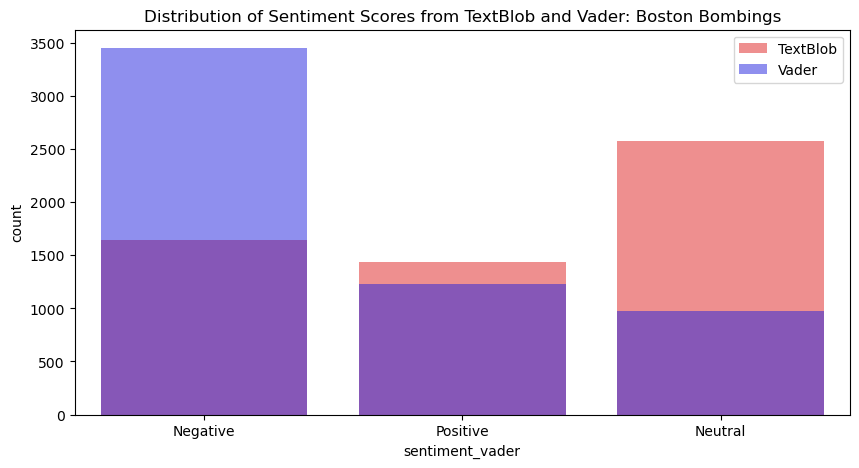

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x="sentiment_textblob", data= bomb , label="TextBlob", color='r', alpha=0.5)
sns.countplot(x="sentiment_vader", data= bomb , label="Vader", color='b', alpha=0.5)
plt.legend()
plt.title('Distribution of Sentiment Scores from TextBlob and Vader: Boston Bombings')
plt.show()

## Hurricane Sandy

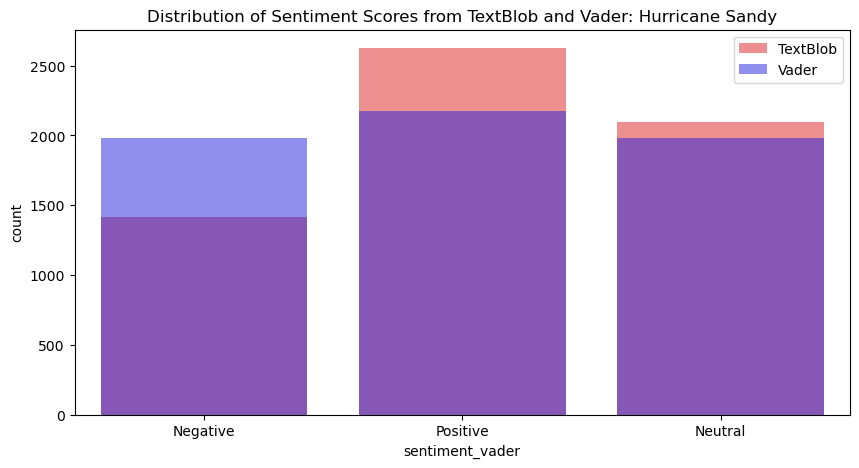

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(x="sentiment_textblob", data=sandy, label="TextBlob", color='r', alpha=0.5)
sns.countplot(x="sentiment_vader", data=sandy , label="Vader", color='b', alpha=0.5)
plt.legend()
plt.title('Distribution of Sentiment Scores from TextBlob and Vader: Hurricane Sandy')
plt.show()

# Topic Modeling

# NOTE: RUN THIS SH IN ORDER OR WE GON HAVE ISSUES

- Aight add your explanations in here
- This a WIP I'm not sure it'll run but let's see

## Boston Bombing

In [52]:
# We will only use the 'text_cleaned' column for our analysis
boom = bomb['clean_text']

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data_boom = count_vectorizer.fit_transform(boom)

print(count_vectorizer.get_feature_names_out(boom))

['00' '000' '00am' ... 'zoom' 'zs' 'álbum']


In [53]:
# Tweak the two parameters below (use int values below 15)
# we technically don't need number_words but I'm leaving it here just in case
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data_boom)

LatentDirichletAllocation(n_components=5, n_jobs=-1)

In [54]:
lda.components_.shape

(5, 6493)

In [64]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % (topic_idx+1))
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_topics(lda, count_vectorizer, number_words)


Topic #1:
boston marathon news guy rt bombing guys stop pressure obama

Topic #2:
boston marathon rt gt bombing finish victims line run school

Topic #3:
boston rt explosion bomb bostonmarathon marathon bombing prayforboston texas week

Topic #4:
boston prayforboston rt people prayers marathon today just bostonmarathon tragedy

Topic #5:
boston rt marathon bombing suspect suspects bombings fbi breaking explosions


In [67]:
### add explanation about top 5 topics about boston bombing here

### Visualization

In [66]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from sklearn.manifold import TSNE

# Get topic weights
topic_weights = lda.transform(count_data)

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

from bokeh.io import output_notebook
from bokeh.plotting import figure, show

# Plot the Topic Clusters using Bokeh
output_notebook()
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot_bomb = figure(title="Clustering of Top {} Boston Bombing Topics".format(number_words), 
              width=900, height=700)

plot_bomb.scatter(x=tsne_lda[:,0], 
                  y=tsne_lda[:,1], 
                  color=mycolors[topic_num])
show(plot_bomb)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5633 samples in 0.003s...
[t-SNE] Computed neighbors for 5633 samples in 0.195s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5633
[t-SNE] Computed conditional probabilities for sample 2000 / 5633
[t-SNE] Computed conditional probabilities for sample 3000 / 5633
[t-SNE] Computed conditional probabilities for sample 4000 / 5633
[t-SNE] Computed conditional probabilities for sample 5000 / 5633
[t-SNE] Computed conditional probabilities for sample 5633 / 5633
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.759174
[t-SNE] KL divergence after 1000 iterations: 0.434088


Loading BokehJS ...

## Hurricane Sandy

In [37]:
# We will only use the 'text_cleaned' column for our analysis
natural = sandy['clean_text']

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(natural)

In [38]:
# Tweak the two parameters below (use int values below 15)
# we technically don't need number_words but I'm leaving it here just in case
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda_model = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

LatentDirichletAllocation(n_components=5, n_jobs=-1)

In [39]:
words = list(count_vectorizer.get_feature_names_out())
len(words)

7912

In [40]:
lda.components_.shape

(5, 7912)

In [41]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % (topic_idx+1))
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [43]:
print_topics(lda, count_vectorizer, number_words)


Topic #1:
hurricane rt sandy school like bitch power went bout don

Topic #2:
hurricane sandy rt safe people coast east affected stay power

Topic #3:
hurricane rt sandy just rain oh actually don storm brought

Topic #4:
hurricane sandy rt shit need lt like scary got ain

Topic #5:
hurricane sandy new rt york time city good frankenstorm day


In [46]:
### add explanation about top 5 topics about Hurricane Sandy here

### Visualization

In [53]:
# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda.transform(count_data)):
    topic_weights.append([w for i, w in enumerate(row_list)])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6130 samples in 0.003s...
[t-SNE] Computed neighbors for 6130 samples in 0.199s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6130
[t-SNE] Computed conditional probabilities for sample 2000 / 6130
[t-SNE] Computed conditional probabilities for sample 3000 / 6130
[t-SNE] Computed conditional probabilities for sample 4000 / 6130
[t-SNE] Computed conditional probabilities for sample 5000 / 6130
[t-SNE] Computed conditional probabilities for sample 6000 / 6130
[t-SNE] Computed conditional probabilities for sample 6130 / 6130
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.344719
[t-SNE] KL divergence after 1000 iterations: 0.408147


In [44]:
output_notebook()
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot_nature = figure(title="Clustering of Top {} Hurricane Sandy Topics".format(number_topics), 
              width=900, height=700)
plot_nature.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot_nature)

Loading BokehJS ...

# Results/Findings

- lmao good luck

# Results

- Goodnight
- I'm out

In [ ]:
## Testing Site

In [72]:
!pip install pyldavis --user
!pip install spacy

  Using cached spacy-3.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.6 MB)
  Using cached srsly-2.4.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (492 kB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached spacy_loggers-1.0.4-py3-none-any.whl (11 kB)
  Using cached pathy-0.10.1-py3-none-any.whl (48 kB)
  Using cached preshed-3.0.8-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (124 kB)
  Using cached typer-0.7.0-py3-none-any.whl (38 kB)
  Using cached cymem-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34 kB)
  Using cached wasabi-1.1.2-py3-none-any.whl (27 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached pydantic-1.10.9-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached thinc-8.1.10-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (913 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.wh

In [73]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re
import pyLDAvis
import pyLDAvis.gensim

In [77]:
tweets = pd.read_csv('2013_Boston_Bombings-ontopic_offtopic.csv') #Change this with the name of your downloaded file
tweets = tweets.Tweets.values.tolist()

# Turn the list of string into a list of tokens
tweets = [t.split(',') for t in tweets]

AttributeError: 'DataFrame' object has no attribute 'Tweets'

In [74]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary=lda_model.id2word)
vis

NameError: name 'corpus' is not defined